# MINSET digin recognizer using MLP
* generalization score (on kaggle)  0.977
* training accuracy: 0.9946
* validation accuracy: 0.9802

## Model 2.1
### Structure

Use 200 neurons in hidden layers instead of 25,12 in model2 and add droup out with probability of 0.8

- Input layer 784 elements
- Hidden layer 1, 200 neurons, relu activation, dropout keep_prob=0.8
- Hidden layer 2, 200 neurons, relu activation, dropout keep_prob=0.8
- Output layer 10 neurons, sigmoid activation


- Number of iterations 50
- Loss function: categorical_crossentropy
- Adam optimization algoithm for backpropogation
    - learning rate 0.001


In [1]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/home/zein/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#helpers
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [3]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

trainLabels=train.label
train.drop("label",axis=1,inplace=True)

train=train/256.0
test=test/256.0
Xtrain=train.as_matrix()
Xtest=test.as_matrix()

print( Xtrain.shape, trainLabels.shape)

(42000, 784) (42000,)


In [4]:
Xtrain, Xval, trainLabels, valLabels = train_test_split( Xtrain, trainLabels, test_size=0.1
                                                        ,shuffle=True ,stratify=trainLabels)
ytrain=convert_to_one_hot(trainLabels,10).T
yval=convert_to_one_hot(valLabels,10).T

/home/zein/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


(array([413., 468., 418., 435., 407., 380., 414., 440., 406., 419.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

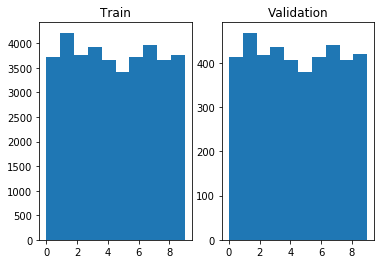

In [5]:
# Make sure of train_test_split work
plt.figure("train/validation labels distribution")
plt.subplot(1,2,1)
plt.title("Train")
plt.hist(trainLabels)
plt.subplot(1,2,2)
plt.title("Validation")
plt.hist(valLabels)

In [6]:
import tensorflow as tf
s = tf.InteractiveSession()

In [7]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28*28]))


# network body
model.add(ll.Dense(200))
model.add(ll.Activation('relu'))
model.add(ll.Dropout(0.2))

model.add(ll.Dense(200))
model.add(ll.Activation('relu'))
model.add(ll.Dropout(0.2))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

Using TensorFlow backend.


In [8]:
model.fit(Xtrain, ytrain,
          validation_data=(Xval, yval), epochs=50);

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 11s 278us/step - loss: 0.3159 - acc: 0.9027 - val_loss: 0.1390 - val_acc: 0.9588
Epoch 2/50
37800/37800 [==============================] - 9s 227us/step - loss: 0.1451 - acc: 0.9555 - val_loss: 0.1163 - val_acc: 0.9662
Epoch 3/50
37800/37800 [==============================] - 8s 217us/step - loss: 0.1085 - acc: 0.9657 - val_loss: 0.0969 - val_acc: 0.9719
Epoch 4/50
37800/37800 [==============================] - 8s 204us/step - loss: 0.0871 - acc: 0.9719 - val_loss: 0.0989 - val_acc: 0.9695
Epoch 5/50
37800/37800 [==============================] - 7s 190us/step - loss: 0.0736 - acc: 0.9763 - val_loss: 0.0929 - val_acc: 0.9726
Epoch 6/50
37800/37800 [==============================] - 8s 208us/step - loss: 0.0656 - acc: 0.9781 - val_loss: 0.0920 - val_acc: 0.9717
Epoch 7/50
37800/37800 [==============================] - 9s 239us/step - loss: 0.0570 - acc: 0.9815 - val_loss: 0.0792 - 

In [9]:
predictions=model.predict(test)
numbers=np.argmax(predictions,axis=1)

In [10]:
ids=np.arange(1,numbers.shape[0]+1)
df = pd.DataFrame({'ImageId':ids, 'Label': numbers})

df.to_csv("output/model3.0.csv", index=False)

### details about this model

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
__________

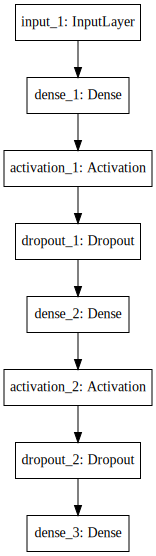

In [12]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
plot_model(model, to_file='output/model3.0.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
# Save trained weights
model.save("model3.0.h5")